In [1]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Attribute Information:
#1. Number of times pregnant 
#2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
#3. Diastolic blood pressure (mm Hg) 
#4. Triceps skin fold thickness (mm) 
#5. 2-Hour serum insulin (mu U/ml) 
#6. Body mass index (weight in kg/(height in m)^2) 
#7. Diabetes pedigree function 
#8. Age (years) 
#9. Class variable (0 or 1) 

In [3]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes = pd.read_csv("pima-indians-diabetes.data", names=names)
diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
X = diabetes[['plas','mass']]

In [7]:
y = diabetes['class']

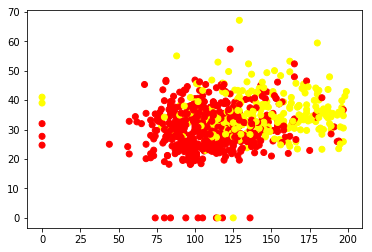

In [8]:
plt.scatter(X['plas'], X['mass'], c=y, cmap='autumn')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
import numpy as np
X_train = np.array(X_train)

In [11]:
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
from sklearn import svm
model = svm.SVC(kernel = 'linear', C = 100)  # C is the complexity parameter. Larger the c value, tighter are the margins of the hyperplane. Smaller c values tend to have softer margins and are more stable.
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7619047619047619

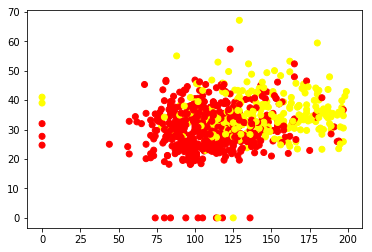

In [14]:
plt.scatter(np.array(X)[:,0],np.array(X)[:,1], c = y, cmap='autumn')

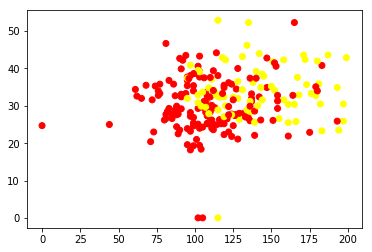

In [15]:
plt.scatter(np.array(X_test)[:,0],np.array(X_test)[:,1], c = pd.Series(y_test), cmap='autumn')

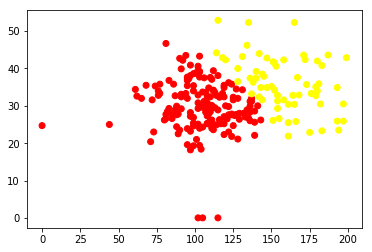

In [16]:
plt.scatter(np.array(X_test)[:,0],np.array(X_test)[:,1], c = pd.Series(y_pred), cmap='autumn')

In [17]:
model2 = svm.SVC(kernel = 'rbf')
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

/Users/ashish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
accuracy_score(y_test, y_pred2)

0.7359307359307359

# Improve the accuracy 

## What C and kernel values we take

In [19]:
model = svm.SVC(kernel = 'linear', C = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.7662337662337663